# Building a realtime anomaly detector

###  By: Peter Tillotson [( Acumed Consulting Ltd )](https://acumedconsulting.com)


| Part | Learning Objectives |
| ---- | :----------------- |
| 1 | Setting up your dev environment and getting some data to work with |
| 2 | Learning to read and process data |
| 3 | Simple linear regression, building stats based detectors | 
| 4 | Understanding seaonality |


At the end of the season you should have built a realtime detector.

## About me

 - Lead data analyst at Riot Games
 - Pasionate about Gaming Analytics
 - Set up and run the London Gaming Analytics Meetup
 - Have done a bunch of Security work too
 - Learning to play drums
 - PhD Distributed intelligent agents
 - 20yrs experience R&D making things fast


# Part 1

> Develpment environment setup

tl;dr:
 - Create a virtual environment for our project
 - Install all the project dependencies
 - Pull down and extract some data to play with

## A note on Python versions

**Always Python 3+** These days I would recommend Python 3.6 and above. 

Python 2.7 persists because its used in quite a few Linux distros to manage 
packages, OS scripts etc. 

If you can use Python 3 do so, occasionally there is a package that does not 
support Python 3, it is rare these day and may be because its not maintained 
or there alternatives that have superceded in 3.

> tl;dr we need to let go of 2.7

### Virtual Environments

Are clean Python virtual install, they are actually simlinks to your 
main Python install, but they don't have any installed packages. This 
means when working on lots of projects fewer dependency conflicts. 

```bash
base> pip install virtualenv
base> virtualenv -p python3 venv      
base> source venv/bin/activate
venv> pip install -r requirements.txt
```

On Windows I would advise the Anaconda install of Python generally, some 
things are easier with this install. It has a built in version to.

https://towardsdatascience.com/getting-started-with-python-environments-using-conda-32e9f2779307

I prefer virtualenv, as I work on Mac, Linux and Windows.  

On Windows the activate is `.\venv\Scripts\activate.bat`

### Project Dependencies

The convention is for Python projects to have a `requirements.txt` in 
there base directory, often alongside a `distutils` `setup.py` file. 
You can specify packages your project depend on in this file, or 
you can.

```
venv> pip install pandas jupyter scipy
venv> pip freeze > requirements.txt
```

Which creates the requirements file from currently installed packages. 

These can be installed with

```
venv> pip install -r requirements.txt
```

Follow this link to download my requirements.txt file. 

### **Excercise 1a** 

Todo:
 - Create a new project directory, change into it
 - Get your virtualenv created pointing to a Python3 install
 - Switch into your new virtual environment 
 - Download and install the requirements in you virtual env
 
### **Excercise 1b**

Todo:
 - Create two folders in your project `data` and `notebooks`
 - Get data: https://github.com/numenta/NAB/archive/v1.0.zip
   - If you raced through the last bit get data programatically
   - Else download manually and unpack into data

In [1]:
import requests, zipfile, io, os, glob, shutil

from os.path import exists, join, split

prefix = 'NAB-1.0/data'
data_dir = '../data'
fd_done = 'success.txt'

if exists( join(data_dir, fd_done) ) == False:
    if exists(data_dir) == False:
        os.mkdir(data_dir)

    url = 'https://github.com/numenta/NAB/archive/v1.0.zip'
    r = requests.get(url)

    with zipfile.ZipFile(io.BytesIO(r.content)) as z:
        for n in z.namelist():
            if n.startswith(prefix) and n.endswith('csv'):
                z.extract(n, path=data_dir)

    path = join(data_dir, prefix, '*')
    for n in glob.glob(path):
        head, tail = split(n)
        new_path = join(data_dir, tail)
        shutil.move(n, new_path)
    head, tail = split(join(data_dir, prefix))
    shutil.rmtree(head)
    with open(join(data_dir, fd_done), 'w') as fd:
        fd.write('done')
else:
    print('data already pulled')

data already pulled


We did it 

<img src='./static/200w_d.gif' width='400'/>

# Part 2

> Read and process data

tl;dr:
 - Read data with Python Pandas
 - Simple plot with Matplotlib and Plotly
 - Interpolate and 
 - Resample

In [2]:
import pandas as pd

# timestamp,value
# 2015-02-26 21:42:53,35
# 2015-02-26 21:47:53,41
# 2015-02-26 21:52:53,32
# 2015-02-26 21:57:53,36
# 2015-02-26 22:02:53,32

df = pd.read_csv('../data/realTweets/Twitter_volume_GOOG.csv', 
    index_col=0, 
    parse_dates=True
)
df.head(5)

,value
timestamp,
2015-02-26 21:42:53,35
2015-02-26 21:47:53,41
2015-02-26 21:52:53,32
2015-02-26 21:57:53,36
2015-02-26 22:02:53,32


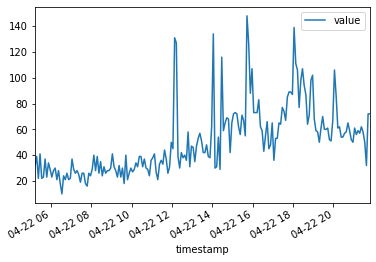

In [3]:
import matplotlib
%matplotlib inline

df.tail(200).plot()

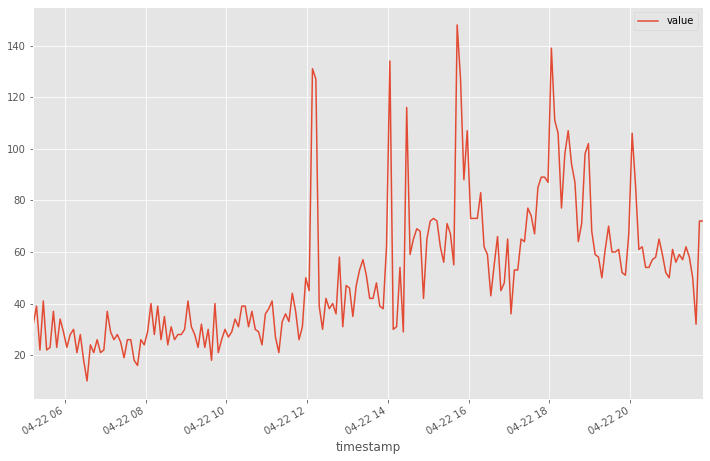

In [4]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
matplotlib.style.use('ggplot')
df.tail(200).plot()

In [14]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(
        x=df.tail(200).index, 
        y=df.tail(200).value,
        mode='lines'
))
fig.show(config={'displaylogo':False})